## Comparing two SST products: NOAA GDP and MUR

The goal of the activity is to compare two SST estimate products: The Global Drifter Program hourly SST product [Elipot et al. 2022](https://dx.doi.org/10.1038/s41597-022-01670-2) and the Multi-scale Ultra-high Resolution (MUR) SST analysis [Chin et al. 2017](https://doi.org/10.1016/j.rse.2017.07.029), a product mostly based on satellite SST data. Please refer to these respective papers for further details about these datasets. 

#### Preliminary: load the matched up dataset of SST values from both products, and do a bit of visualization 

In [41]:
# these are the packages that you will most likely need to complete the assignment
import numpy as np
# we use xarray here to open the dataset and visialize its content but you can easily work with numpy arrays instead
import xarray as xr
import matplotlib.pyplot as plt
import scipy as sp
# clouddrift is a package that is dedicated to work with Lagrangian datasets arranged as ragged array
# you may want to eventually use it for its ragged.subset function which will allow you to further filter data
import clouddrift as cd

In [42]:
# data import and display with xarray; change path as needed
# We start by opening the extracted dataset for Atlantic region, which consists of portions of drifter trajectories at hourly intervals
file = 'data/gdp_atlantic.nc'
ds = xr.open_dataset(file,decode_times=True)
ds

<xarray.Dataset> Size: 173MB
Dimensions:                (traj: 804, obs: 1799525)
Coordinates:
    id                     (traj) int64 6kB ...
    time                   (obs) datetime64[ns] 14MB ...
Dimensions without coordinates: traj, obs
Data variables: (12/62)
    BuoyTypeManufacturer   (traj) |S20 16kB ...
    BuoyTypeSensorArray    (traj) |S20 16kB ...
    CurrentProgram         (traj) float32 3kB ...
    DeployingCountry       (traj) |S20 16kB ...
    DeployingShip          (traj) |S20 16kB ...
    DeploymentComments     (traj) |S20 16kB ...
    ...                     ...
    typedeath              (traj) int8 804B ...
    ve                     (obs) float32 7MB ...
    vn                     (obs) float32 7MB ...
    mur_sst                (obs) float32 7MB ...
    mur_sst_err            (obs) float32 7MB ...
    mur_dt_1km             (obs) float64 14MB ...
Attributes: (12/16)
    Conventions:       CF-1.6
    acknowledgement:   Elipot, Shane; Sykulski, Adam; Lumpkin, Rick; Centurio...
    contributor_name:  NOAA Global Drifter Program
    contributor_role:  Data Acquisition Center
    date_created:      2023-09-08T17:05:12.130123
    doi:               10.25921/x46c-3620
    ...                ...
    processing_level:  Level 2 QC by GDP drifter DAC
    publisher_email:   aoml.dftr@noaa.gov
    publisher_name:    GDP Drifter DAC
    publisher_url:     https://www.aoml.noaa.gov/phod/gdp
    summary:           Global Drifter Program hourly data
    title:             Global Drifter Program hourly drifting buoy collection

In [43]:
# the data are organized as ragged arrays, see https://clouddrift.org for more information. For this activity you may not need to worry about this. 
# The variables you will be first working with are sst, err_sst, flg_sst, mur_sst, mur_sst_err.

# unpack the trajectory data into lists for easier plotting
from clouddrift.ragged import unpack

time = unpack(ds["time"],rowsize=ds["rowsize"])
sst = unpack(ds["sst"],rowsize=ds["rowsize"])
err_sst = unpack(ds["err_sst"],rowsize=ds["rowsize"])
sst_mur = unpack(ds["mur_sst"],rowsize=ds["rowsize"])
err_sst_mur = unpack(ds["mur_sst_err"],rowsize=ds["rowsize"])


<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
/var/folders/fx/qsnv05_94vs9qzp4p0qww8c00000gn/T/ipykernel_37904/602474274.py:10: SyntaxWarning: invalid escape sequence '\s'
  plt.legend(['Drifter SST','Drifter SST 2 $\sigma$','MUR SST','MUR SST 2 $\sigma$'])
/var/folders/fx/qsnv05_94vs9qzp4p0qww8c00000gn/T/ipykernel_37904/602474274.py:10: SyntaxWarning: invalid escape sequence '\s'
  plt.legend(['Drifter SST','Drifter SST 2 $\sigma$','MUR SST','MUR SST 2 $\sigma$'])


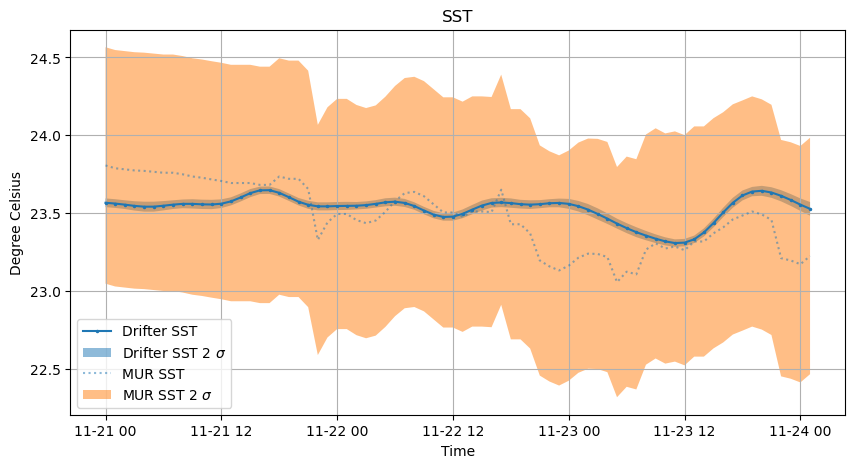

In [44]:
# plot some of the data
# note the difference in magnitude between the two SST uncertainty estimates
m = 1
offset = 273.15
plt.figure(figsize=(10, 5))
hc = plt.plot(time[m], sst[m] - offset,marker = '.',markersize=3)
plt.fill_between(time[m], sst[m]-2*err_sst[m] - offset, sst[m]+2*err_sst[m] - offset, alpha=0.5)
plt.plot(time[m], sst_mur[m] - offset, color=hc[0].get_color(),alpha=0.5,linestyle=':')
plt.fill_between(time[m], sst_mur[m]-2*err_sst_mur[m] - offset, sst_mur[m]+2*err_sst_mur[m] - offset, alpha=0.5)
plt.legend(['Drifter SST','Drifter SST 2 $\sigma$','MUR SST','MUR SST 2 $\sigma$'])
plt.title('SST')
plt.xlabel('Time')
plt.ylabel('Degree Celsius')
plt.grid(True) 
plt.show()

In [45]:
#func = (lambda arr: ((arr - arr[0]) % 2) == 0)
from clouddrift.ragged import subset

# define a function that selects the 9am data points
def select_9am(arr):
                    return (arr - arr.astype("datetime64[D]")) / np.timedelta64(1, "s") == 32400

ds9 = subset(ds, {"time": select_9am}, row_dim_name="traj")
ds9

<xarray.Dataset> Size: 7MB
Dimensions:                (traj: 797, obs: 74921)
Coordinates:
    id                     (traj) int64 6kB 26656 18702 ... 300534061551870
    time                   (obs) datetime64[ns] 599kB 2002-11-24T09:00:00 ......
Dimensions without coordinates: traj, obs
Data variables: (12/62)
    BuoyTypeManufacturer   (traj) |S20 16kB ...
    BuoyTypeSensorArray    (traj) |S20 16kB ...
    CurrentProgram         (traj) float32 3kB ...
    DeployingCountry       (traj) |S20 16kB ...
    DeployingShip          (traj) |S20 16kB ...
    DeploymentComments     (traj) |S20 16kB ...
    ...                     ...
    typedeath              (traj) int8 797B ...
    ve                     (obs) float32 300kB ...
    vn                     (obs) float32 300kB ...
    mur_sst                (obs) float32 300kB 296.2 296.6 296.5 ... 297.3 296.7
    mur_sst_err            (obs) float32 300kB 0.38 0.37 0.37 ... 0.38 0.38 0.39
    mur_dt_1km             (obs) float64 599kB ...
Attributes: (12/16)
    Conventions:       CF-1.6
    acknowledgement:   Elipot, Shane; Sykulski, Adam; Lumpkin, Rick; Centurio...
    contributor_name:  NOAA Global Drifter Program
    contributor_role:  Data Acquisition Center
    date_created:      2023-09-08T17:05:12.130123
    doi:               10.25921/x46c-3620
    ...                ...
    processing_level:  Level 2 QC by GDP drifter DAC
    publisher_email:   aoml.dftr@noaa.gov
    publisher_name:    GDP Drifter DAC
    publisher_url:     https://www.aoml.noaa.gov/phod/gdp
    summary:           Global Drifter Program hourly data
    title:             Global Drifter Program hourly drifting buoy collection

For this activity, we suggest for you to get started with this subset of the data, that is only the 9:00am UTC data both for the drifters and the MUR estimates.

#### Question 1:	Investigate the differences between the drifter SST data and the MUR SST data at the drifter locations. As examples, plot visual comparisons such as scatter plots, 2-d histograms and Q-Q plots comparing the two and discuss properties you can infer from these plots.

In [49]:
# from there on we suggest that you use numpy arrays and treat the data independlt of their trajectory of origin. 
# Effectively, we aret treating the data at 24 intervals at 9:00am from the different trajectories as independent samples.
offset = 273.15 # to work with degree celsius
sst = ds9['sst'].values - offset
err_sst = ds9['err_sst'].values
flg_sst = ds9['flg_sst'].values

mur_sst = ds9['mur_sst'].values - offset
mur_sst_err = ds9['mur_sst_err'].values


In [50]:
# Use the data quality flag for SST from drifters and choose data only with quality flag 4 and 5, see Elipot et al. 2022
a = flg_sst < 4
sst = sst[~a]
err_sst = err_sst[~a]

mur_sst = mur_sst[~a]
mur_sst_err = mur_sst_err[~a]

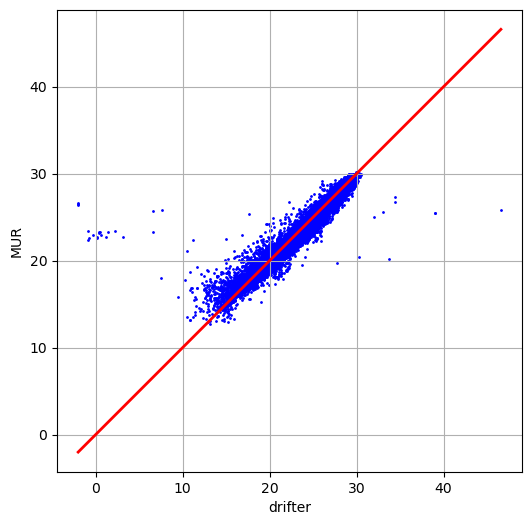

In [52]:
# we are getting you started with a simple scatter plot of the data, now you continue ...

plt.figure(figsize=(6, 6))
plt.scatter(sst, mur_sst, c='b', s=1)
plt.plot([sst.min(), sst.max()], [sst.min(), sst.max()], linewidth=2, color='r')
plt.xlabel('drifter')
plt.ylabel('MUR')
plt.axis('equal')
plt.grid(True)
plt.show()

#### Question 2:	You may notice that there are some large outliers in the drifter SST data. As the drifter SST uncertainties are significantly smaller than the MUR SST uncertainties, we will initially make the (probably incorrect) assumption that the drifters are given us the true SST data. To advance the comparison, we suggest removing any significantly outlying SST drifter data:  First use the flag information to select drifter data with quality flag 4 or more, and further remove the remaining outliers and apply a cutoff based on the data difference. Please experiment with this cutoff: 1 or 2 K or anything else. Redo the plots in Question 1 to check if outliers are removed. What percentage of the data are eliminated as such?


#### Question 3:	For this Question, assuming that the drifter SST data are the truth, let’s use those to validate the MUR SST data (and for now, ignoring the MUR uncertainty estimates provided with the MUR data). Please study the distribution of the MUR SST errors, calculated as the differences between the MUR SST data  at the drifter locations and the drifter SST data. How do you interpret this distribution and its statistical moments (mean, variance, …)?

- Plot a histogram of these errors. Overlay a normal distribution and/or plot a Q-Q plot to see if the distribution of differences are approximately Gaussian, comment whether this assumption is reasonable and see if it changes with different cutoffs used in Question 2.
- What percentage of errors fall  within 1, 2 or 3 standard deviations – comment on how and why this differs from the “68-95-99.7 rule” (that is, if the errors are Gaussian distributed then we expect this percentage of errors to lie within 1, 2 or 3 standard deviations).
- How do you interpret the mean and standard deviation of these errors?

#### Question 4:	Now, taking the results above further, and still assuming the drifters tell the truth, can you :
- tell if the MUR estimates are significantly biased? Conduct a simple hypothesis test (at the 5% significance level) using either the central limit theorem or the bootstrap. 
- Define a 95% confidence interval for all MUR SST, taking into account if the bias is zero or not.

#### Question 5: For this Question, consider the uncertainty estimates provided by MUR (mur_sst_err variable) which estimate the standard deviation of the estimation error in the MUR SST estimates. Study the distribution of the uncertainty estimates, and calculate their mean. How does the mean value compare to the standard deviation of the errors that you studied in Question 3 under the assumption of the drifter SST being the truth?

#### Question 6: Using the MUR uncertainties, what percentage of MUR estimates fall within 1, 2 or 3 standard deviations of the corresponding drifter estimates – using the uncertainty estimates as the values of the standard deviation in your analysis. Comment on how your results differ from Q3 - is there general consistency?

#### Question 7: Now look at the uncertainty estimates for the drifters (err_sst variable) which estimate the standard deviation of the estimation error in the drifter SST estimates. Study the distribution of these uncertainty estimates [suggestion: plot the logarithm of the uncertainty estimates this time], and calculate their mean. How do these values compare with the MUR uncertainties in Q5?

#### Question 8: Now let’s combine the MUR and drifter uncertainty estimates. The easiest way to do this is assume the errors in MUR and drifter estimates are independent at each location. This allows us to consider again (as in Q3) the difference between MUR and drifter estimates at each location. If the errors are independent then the uncertainty of these differences can be calculated from the uncertainty products using the following formula:

Err_diff = sqrt(err_sst.^2+mur_sst_err.^2)

This formula arises because if we have two independent variables X and Y, then Var(X-Y) = Var(X)+Var(Y), and the standard deviations follow by taking the square root of each side.

Compute the mean of the uncertainties across all locations using this formula and compare with Q5. Now repeat Q6 and investigate what percentage of the differences between estimates fall within 1, 2 or 3 standard deviations, how have your results changed?


#### Question 9: Plot the MUR vs drifter uncertainties on a scatter plot or 2D histogram to see if independence between errors appears reasonable (again suggest plotting drifter uncertainties on log scale)

#### Question 10: Overall, would you conclude that the MUR and drifter SST estimates are approximately measuring the same quantity and do the reported uncetainties seem consistent across the datasets?

#### Bonus Challenge, Question 11: investigate incorporating another covariate into your analysis to see if it helps understand things further. One idea would be to look at the effect of the drifter locations and see if uncertainties and errors might vary spatially.